In [1]:
import os
import pickle
import matplotlib.pyplot as plt

In [2]:
def load_dicts_from_pkl(path):
    dictionaries = {}
    
    for file_name in os.listdir(path):
        if file_name.endswith('.pkl'):
            file_path = os.path.join(path, file_name)
            name = os.path.splitext(file_name)[0]
            
            with open(file_path, 'rb') as file:
                dictionary = pickle.load(file)
                dictionaries[name] = dictionary
    
    return dictionaries

In [3]:
models_dict_1 = load_dicts_from_pkl("loss_histories/damping_01")
models_dict_5 = load_dicts_from_pkl("loss_histories/damping_05")
models_dict_10 = load_dicts_from_pkl("loss_histories/damping_10")
models_dict_1_att = load_dicts_from_pkl("loss_histories/damping_01_attractive")

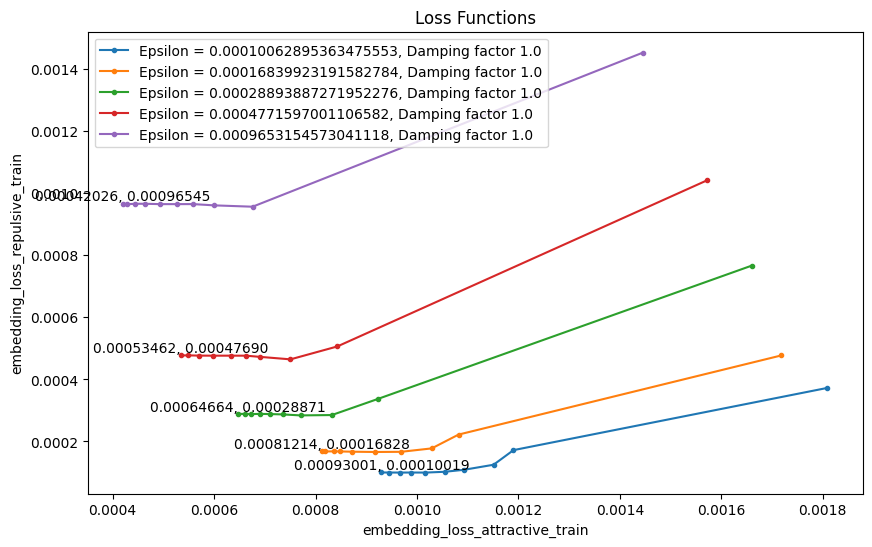

In [4]:
plt.figure(figsize=(10, 6))

for key, model_dict in models_dict_1.items():
    label = f'Epsilon = {model_dict["epsilon"]}, Damping factor {model_dict["damping"]}'
    plt.plot(model_dict['loss_history']['embedding_loss_attractive_train'], 
             model_dict['loss_history']['embedding_loss_repulsive_train'],
             marker='o', markersize=3, label=label)
    
    attractive_loss = model_dict['loss_history']['embedding_loss_attractive_train'][-1]
    repulsive_loss = model_dict['loss_history']['embedding_loss_repulsive_train'][-1]
    plt.text(attractive_loss, repulsive_loss,
             f'{attractive_loss:.8f}, {repulsive_loss:.8f}', ha='center', va='bottom')

plt.xlabel('embedding_loss_attractive_train')
plt.ylabel('embedding_loss_repulsive_train')
plt.title('Loss Functions')

plt.legend()
plt.show()

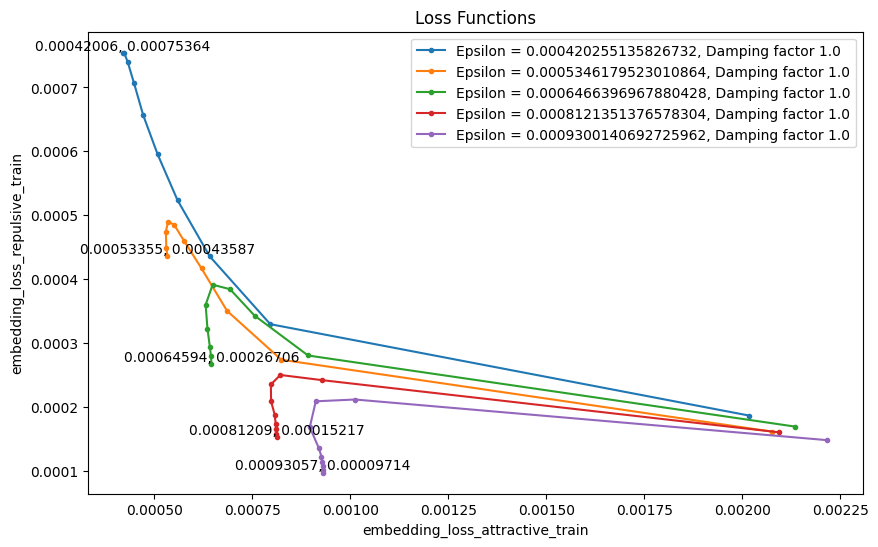

In [5]:
plt.figure(figsize=(10, 6))

for key, model_dict in models_dict_1_att.items():
    label = f'Epsilon = {model_dict["epsilon"]}, Damping factor {model_dict["damping"]}'
    plt.plot(model_dict['loss_history']['embedding_loss_attractive_train'], 
             model_dict['loss_history']['embedding_loss_repulsive_train'],
             marker='o', markersize=3, label=label)
    
    attractive_loss = model_dict['loss_history']['embedding_loss_attractive_train'][-1]
    repulsive_loss = model_dict['loss_history']['embedding_loss_repulsive_train'][-1]
    plt.text(attractive_loss, repulsive_loss,
             f'{attractive_loss:.8f}, {repulsive_loss:.8f}', ha='center', va='bottom')

plt.xlabel('embedding_loss_attractive_train')
plt.ylabel('embedding_loss_repulsive_train')
plt.title('Loss Functions')

plt.legend()
plt.show()

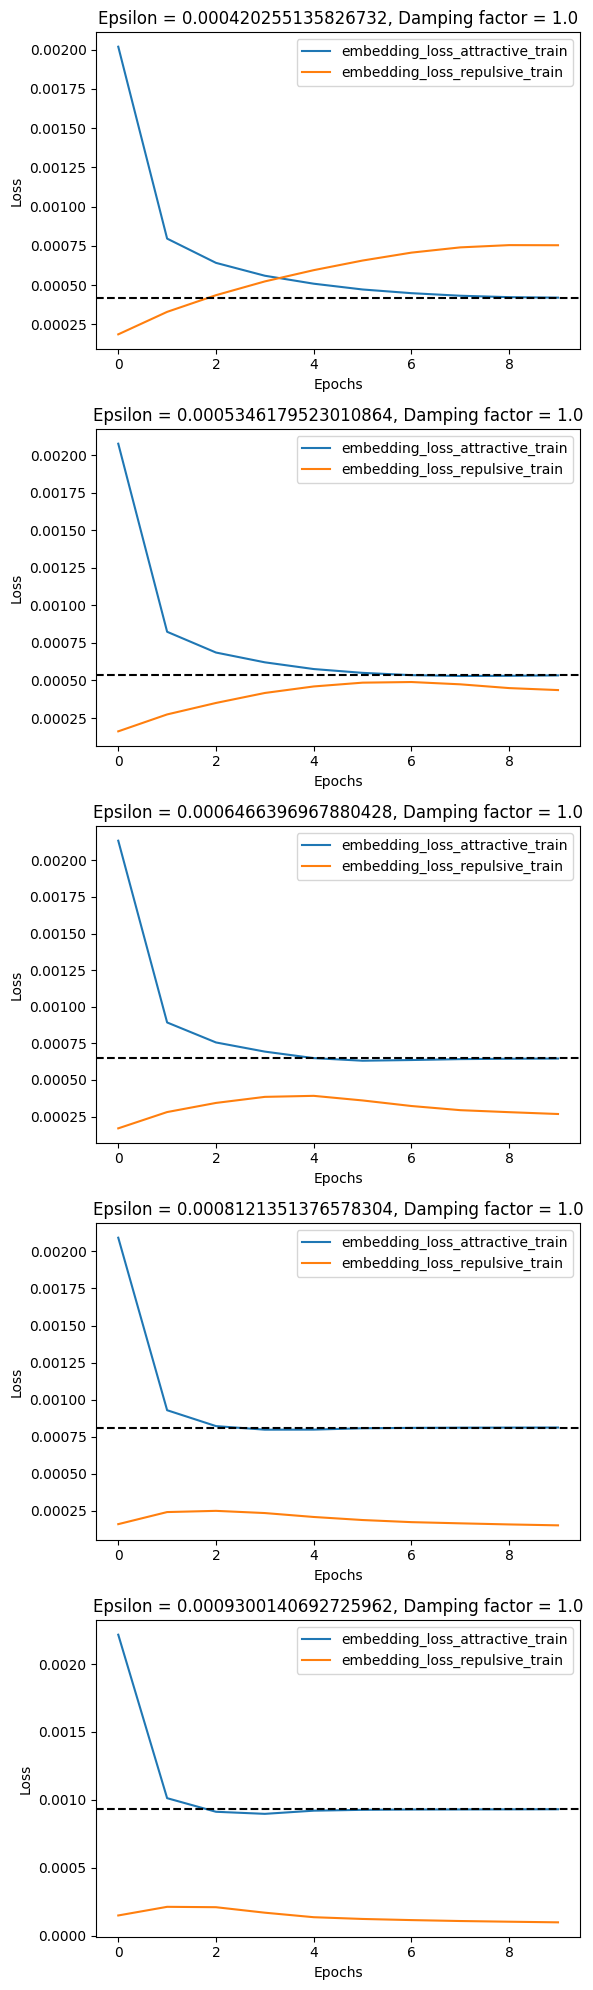

In [6]:
# Create subplots
fig, axs = plt.subplots(len(models_dict_1_att), 1, figsize=(6, 4*len(models_dict_1_att)))

for i, (key, model_dict) in enumerate(models_dict_1_att.items()):
    axs[i].plot(model_dict['loss_history']['embedding_loss_attractive_train'], label='embedding_loss_attractive_train')
    axs[i].plot(model_dict['loss_history']['embedding_loss_repulsive_train'], label='embedding_loss_repulsive_train')
    axs[i].axhline(model_dict["epsilon"], linestyle='--', color='black')

    axs[i].set_xlabel('Epochs')
    axs[i].set_ylabel('Loss')
    axs[i].set_title(f'Epsilon = {model_dict["epsilon"]}, Damping factor = {model_dict["damping"]}')
    axs[i].legend()

plt.tight_layout()
plt.show()

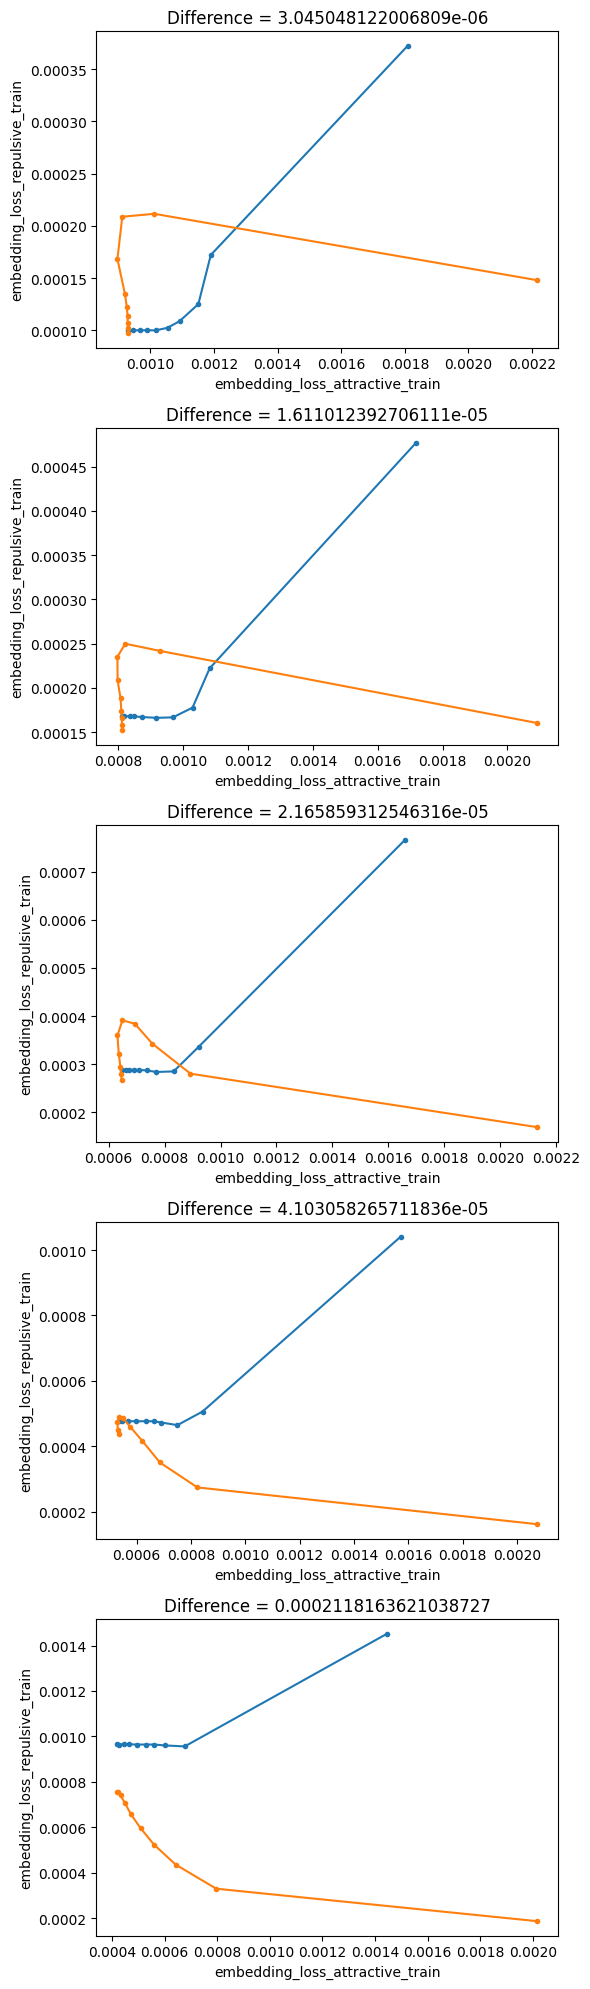

In [7]:
# Create subplots
fig, axs = plt.subplots(len(models_dict_1), 1, figsize=(6, 4*len(models_dict_1)))

for i, (key, model_dict) in enumerate(models_dict_1.items()):
    axs[i].plot(model_dict['loss_history']['embedding_loss_attractive_train'], 
             model_dict['loss_history']['embedding_loss_repulsive_train'],
             marker='o', markersize=3, label='Constraint = repulsive')
    
    attractive_loss = model_dict['loss_history']['embedding_loss_attractive_train'][-1]

    model_dict_att = models_dict_1_att[f'{attractive_loss}_1.0_1.0']
    axs[i].plot(model_dict_att['loss_history']['embedding_loss_attractive_train'], 
             model_dict_att['loss_history']['embedding_loss_repulsive_train'],
             marker='o', markersize=3, label='Constraint = attractive')
    
    axs[i].set_xlabel('embedding_loss_attractive_train')
    axs[i].set_ylabel('embedding_loss_repulsive_train')

    repulsive_loss = model_dict['loss_history']['embedding_loss_repulsive_train'][-1]
    repulsive_loss_2 = model_dict_att['loss_history']['embedding_loss_repulsive_train'][-1]
    axs[i].set_title(f'Difference = {repulsive_loss - repulsive_loss_2}')

plt.tight_layout()
plt.show()